In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
operations =  pd.read_csv("../../output/operational_results.csv")

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_energy(df):
    # Ensure proper sorting and continuous hour axis
    df = df.sort_values(["year", "week", "hour"]).copy()
    df["x"] = df["week"] * 168 + df["hour"]

    sns.set_style("whitegrid")

    for year, df_y in df.groupby("year"):
        fig, ax = plt.subplots(figsize=(14, 6))

        plt.title(f"Energy Balance – {year}", fontsize=16)
        plt.xlabel("Hour")
        plt.ylabel("Value")

        # --- PRODUCTION ---
        df_prod = df_y[df_y["type"] == "Production"]
        if not df_prod.empty:
            pivot_prod = (
                df_prod.pivot_table(index="x", columns="technology", values="value", aggfunc="sum")
                .fillna(0)
            )
            cum = np.zeros(len(pivot_prod))
            for tech in pivot_prod.columns:
                vals = pivot_prod[tech].values
                ax.fill_between(
                    pivot_prod.index,
                    cum,
                    cum + vals,
                    alpha=0.8,
                    label=tech,
                    linewidth=0,   # 🔹 remove edges
                )
                cum += vals

        # --- DISCHARGE ---
        df_dis = df_y[df_y["type"] == "Discharge"]
        if not df_dis.empty:
            pivot_dis = (
                df_dis.pivot_table(index="x", columns="technology", values="value", aggfunc="sum")
                .fillna(0)
            )
            cum = np.zeros(len(pivot_dis))
            for tech in pivot_dis.columns:
                vals = pivot_dis[tech].values
                ax.fill_between(
                    pivot_dis.index,
                    cum,
                    cum + vals,
                    alpha=0.4,
                    label=f"Discharge - {tech}",
                    linewidth=0,
                )
                cum += vals

        # --- UNMET ---
        df_unmet = df_y[df_y["type"] == "Unmet"]
        if not df_unmet.empty:
            pivot_unmet = (
                df_unmet.pivot_table(index="x", columns="technology", values="value", aggfunc="sum")
                .fillna(0)
            )
            cum = np.zeros(len(pivot_unmet))
            for tech in pivot_unmet.columns:
                vals = pivot_unmet[tech].values
                ax.fill_between(
                    pivot_unmet.index,
                    cum,
                    cum + vals,
                    alpha=0.4,
                    label=f"Unmet - {tech}",
                    linewidth=0,
                )
                cum += vals

        # --- DEMAND ---
        df_demand = df_y[df_y["type"] == "Demand"]
        if not df_demand.empty:
            demand_sum = df_demand.groupby("x")["value"].sum()
            ax.plot(demand_sum.index, demand_sum.values, color="black", lw=2, label="Demand")

        # --- WEEK SEPARATORS ---
        for w in sorted(df_y["week"].unique()):
            ax.axvline(w * 168, color="k", linewidth=2, linestyle="--", zorder=0)

        # --- X-LIMITS (4) ---
        ax.set_xlim(df_y["x"].min(), df_y["x"].max())
        ax.set_ylim(df_y["value"].min(),1.1 * df_y["value"].max())

        # --- X-TICKS (7 per week) ---
        weeks = sorted(df_y["week"].unique())
        week_ticks = []
        for w in weeks:
            week_start = w * 168
            for d in range(7):
                week_ticks.append(week_start + d * 24)  # every 24h
        ax.set_xticks(week_ticks)
        ax.set_xticklabels([f"{int(tick % 168)}h" for tick in week_ticks], rotation=45)

        ax.legend(loc="upper right", ncol=2, fontsize=8)
        plt.tight_layout()
        plt.show()


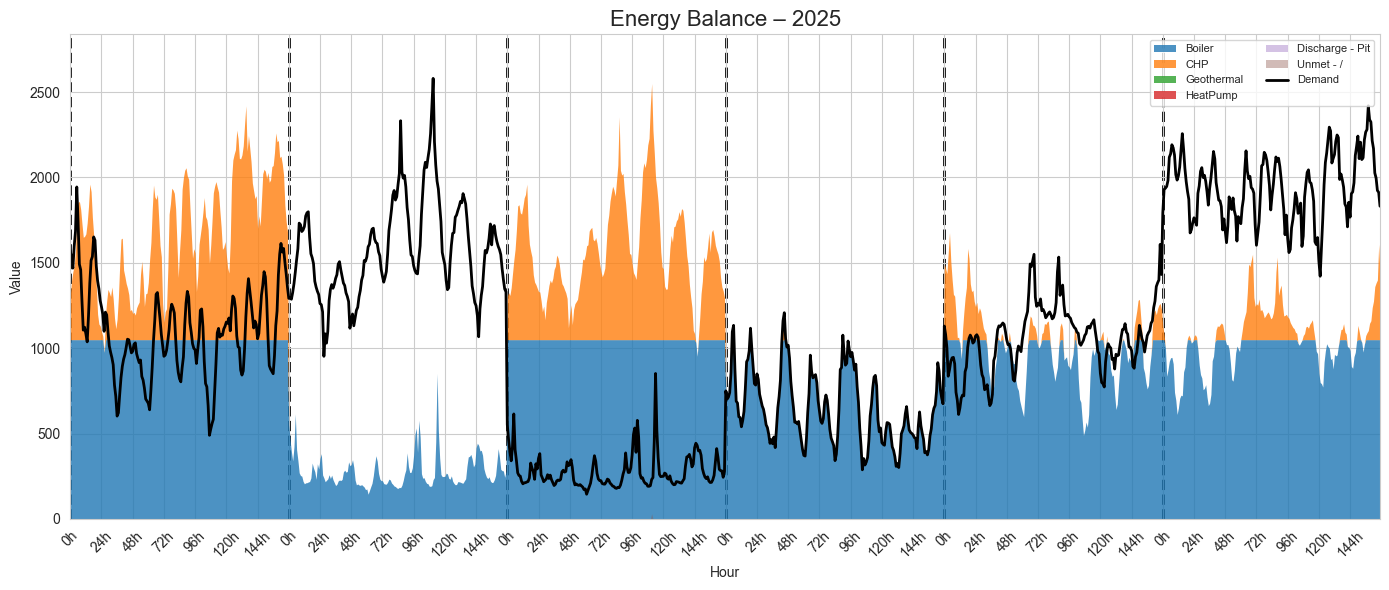

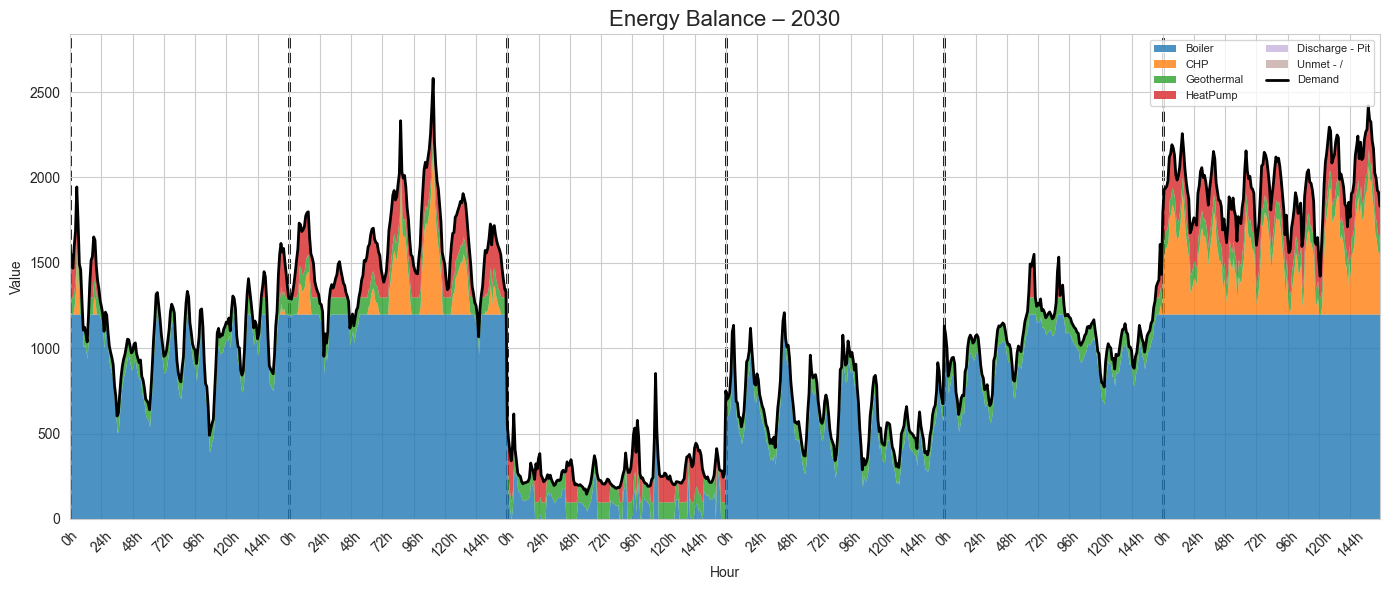

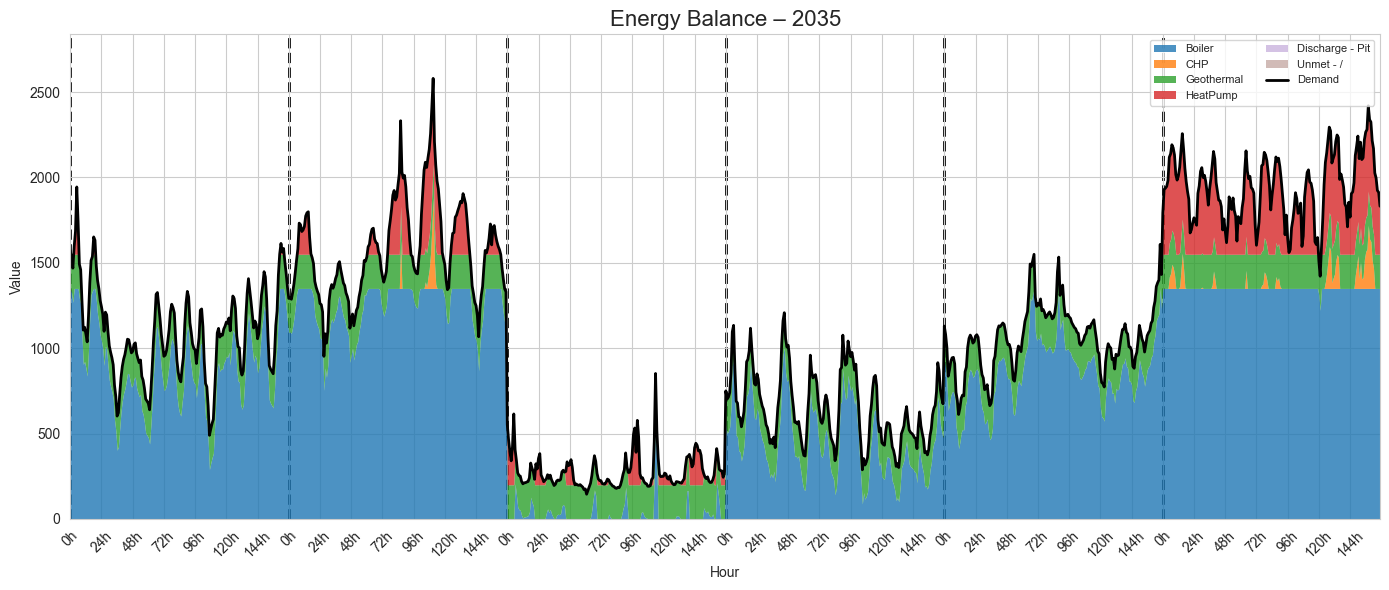

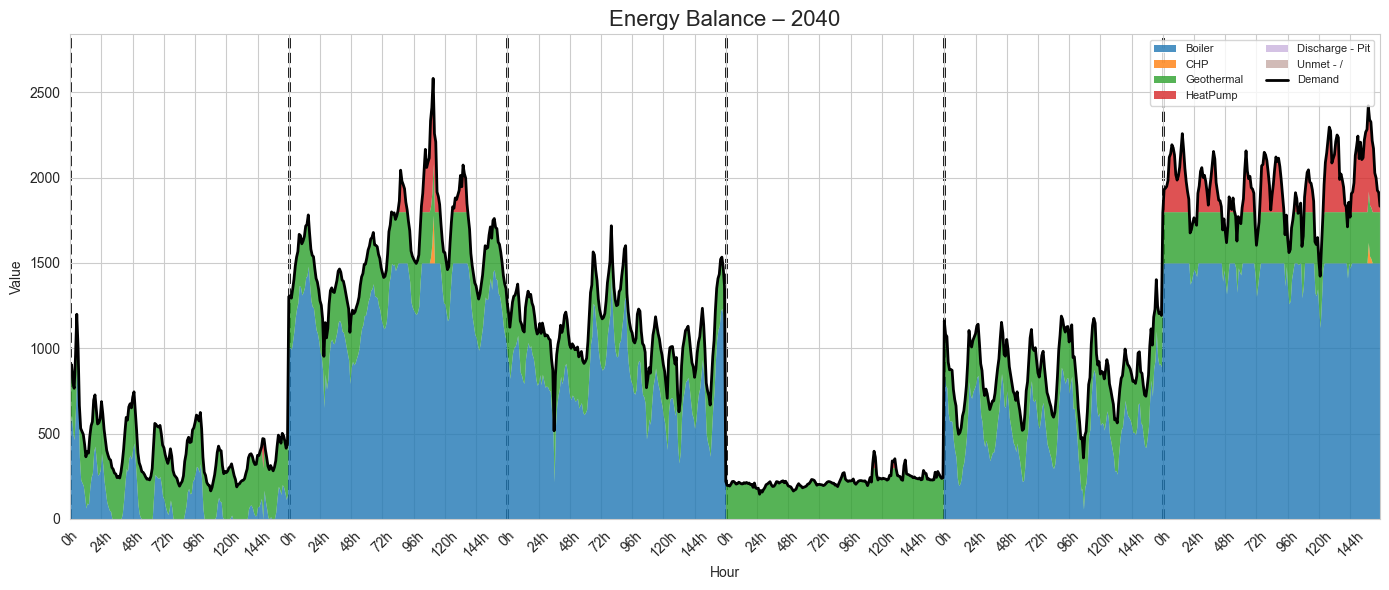

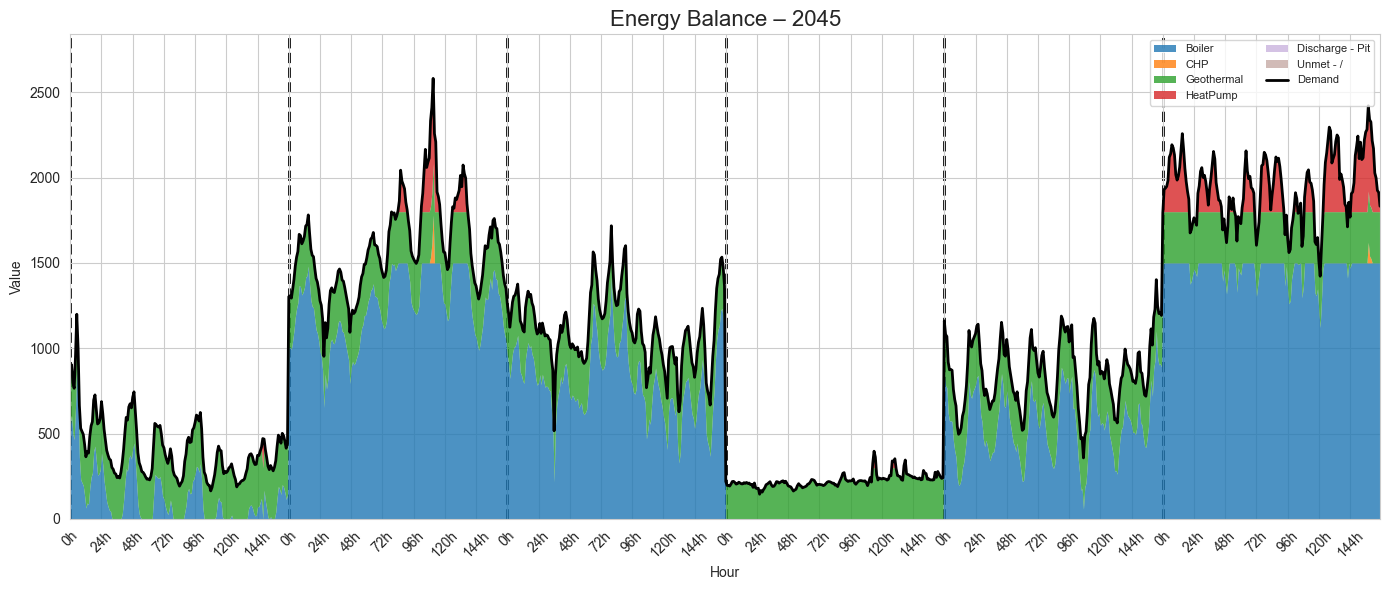

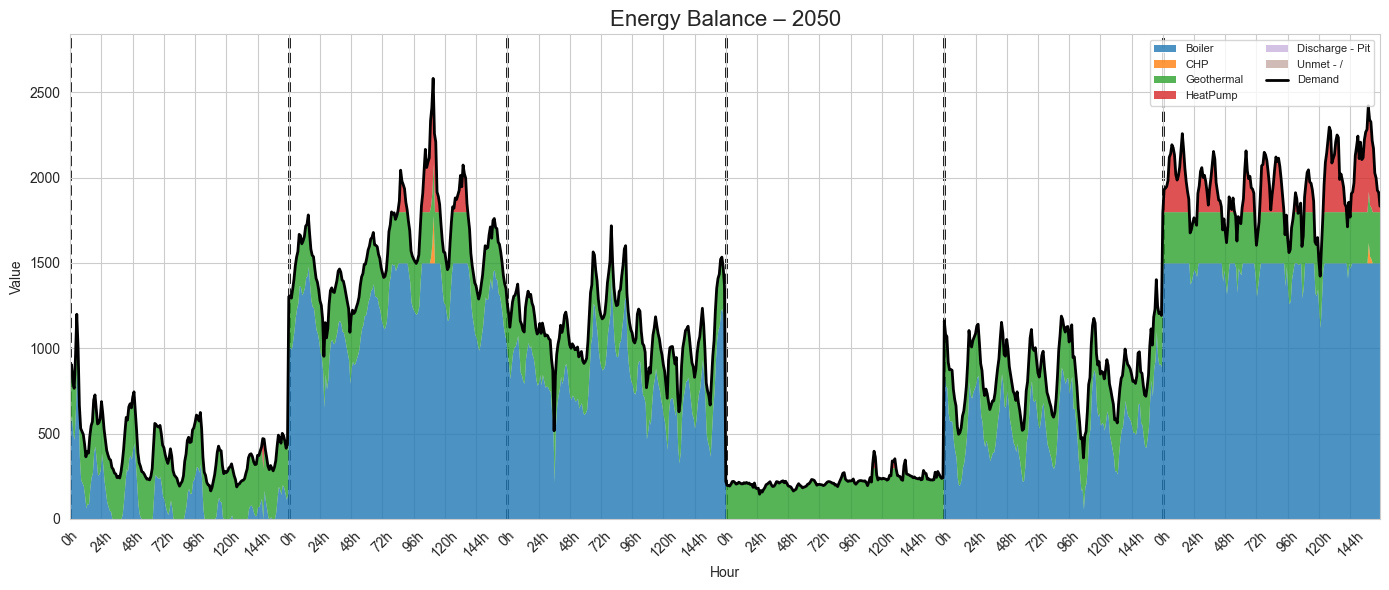

In [23]:
# df = pd.read_csv("operational_results.csv")
plot_energy(operations)
